# Nome: Henrique Augusto Gomes Togo
# Matrícula: 231111280

## Questão 1

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
def gauss(mean, variance, x):
    gauss_vec = []
    for i in range(len(x)):
        prob = np.exp(-(x[i] - mean)**2/(2*variance))/(2*np.pi*variance)**(1/2)
        gauss_vec.append(prob)
    return gauss_vec

In [3]:
def uniform(x):
    return np.ones(len(x)) * 1/(np.max(x) - np.min(x))



In [4]:
x = np.linspace(-2, 2, 1000)
mean = 2
variance = 1
gauss_x = gauss(mean, variance, x)
uniform_x = uniform(x)


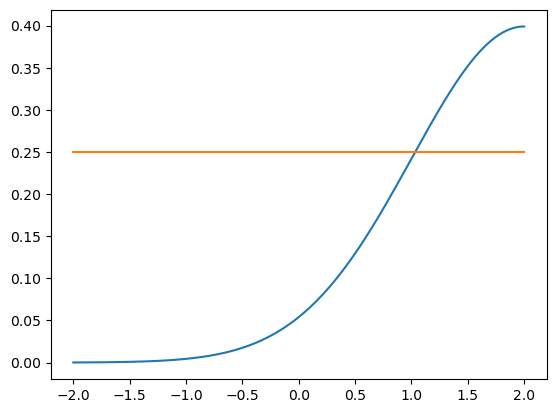

In [5]:
plt.plot(x, gauss_x)
plt.plot(x, uniform_x)
plt.show()